In [1]:
import pandas as pd
import pylab as pl
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
agg_trade_orderbook_all = pd.read_csv('./input_data/all/orderbook_agg_trade_dollarvol.csv')

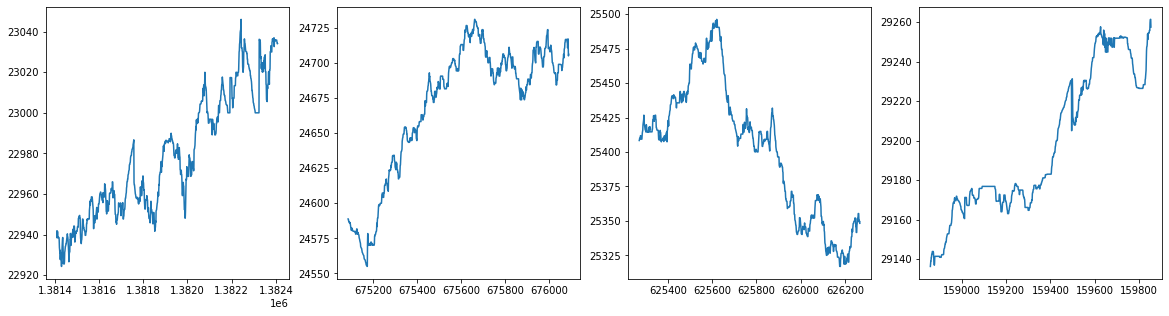

In [4]:
rand = np.random.randint(0, len(agg_trade_orderbook_all)-1000, size=4)

fig, ax = plt.subplots(1, 4, figsize = (20, 5))
ax[0].plot(agg_trade_orderbook_all.price[rand[0]:rand[0]+1000])
ax[1].plot(agg_trade_orderbook_all.price[rand[1]:rand[1]+1000])
ax[2].plot(agg_trade_orderbook_all.price[rand[2]:rand[2]+1000])
ax[3].plot(agg_trade_orderbook_all.price[rand[3]:rand[3]+1000])


## Data Normalization

In [139]:
def medianizer(arr):
    median = np.median(arr)
    std = np.percentile(arr,[75])[0]-np.percentile(arr,[25])[0]
    return median, std
  
def normalizer(arr):
    median = np.mean(arr)
    std = np.std(arr)
    return median, std

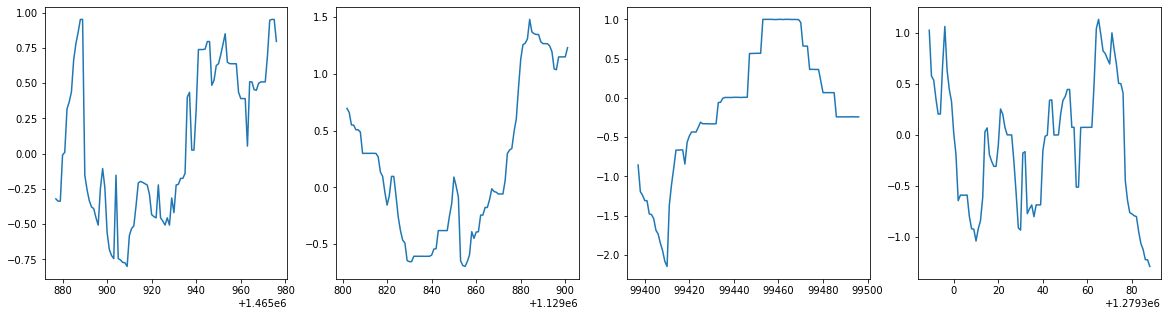

In [31]:
rand = np.random.randint(0, len(agg_trade_orderbook_all)-100, size=4)

fig, ax = plt.subplots(1, 4, figsize = (20, 5))
ax[0].plot(medianizer(agg_trade_orderbook_all.price[rand[0]:rand[0]+100]))
ax[1].plot(medianizer(agg_trade_orderbook_all.price[rand[1]:rand[1]+100]))
ax[2].plot(medianizer(agg_trade_orderbook_all.price[rand[2]:rand[2]+100]))
ax[3].plot(medianizer(agg_trade_orderbook_all.price[rand[3]:rand[3]+100]))

In [178]:
def rolling_medianizer(arr, window=100, stride=1):
    medianized_prices = np.zeros([(len(arr)-2*window), window])
    for idx in range(0, len(arr)-2*window, stride):
        median, std = medianizer(arr[idx: idx+window])
        result = (arr[idx:idx+window]-median)/std
        medianized_prices[idx, :] = result
    return  medianized_prices
  
def rolling_normalizer(arr, window=100, stride=1):
    normalized_prices = np.zeros([(len(arr)-2*window), window])
    for idx in range(0, len(arr)-2*window, stride):
        mean, std = normalizer(arr[idx: idx+window])
        result = (arr[idx:idx+window]-mean)/std
        normalized_prices[idx, :] = result
    return  normalized_prices


In [179]:
def find_optimal_window_size(arr, windows, tests):
    for window in windows:
      result_normal = rolling_normalizer(arr, window, stride=1)
      rand = np.random.randint(0, len(result_normal), size=tests)
      adfuller_normal_results = [adfuller(result_normal[idx])[0] for idx in rand]
      print(f'| normalizer | window: {window} | mean: {np.mean(adfuller_normal_results)} | std: {np.std(adfuller_normal_results)} |')
      plt.plot(adfuller_normal_results)
    return

| normalizer | window: 100 | mean: -1.6289495921004584 | std: 10.530333953115425 |
| normalizer | window: 150 | mean: -1.5109727781478937 | std: 1.6849219741116266 |
| normalizer | window: 200 | mean: -1.5649142212157945 | std: 1.6881269442620979 |


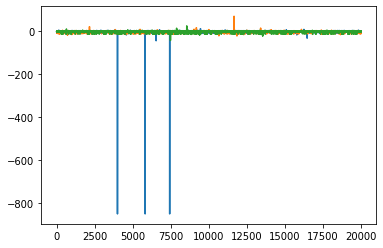

In [180]:
find_optimal_window_size(agg_trade_orderbook_all.price.to_list()[:100_000], windows=[100, 150, 200], tests=20_000)

In [181]:
agg_trade_orderbook_all['price_diff'] = agg_trade_orderbook_all['price']-agg_trade_orderbook_all['price'].shift(1)

In [183]:
test1 = rolling_medianizer(agg_trade_orderbook_all.price_diff.to_list()[1:100_000], window=150, stride=1)
test2 = rolling_normalizer(agg_trade_orderbook_all.price_diff.to_list()[1:100_000], window=150, stride=1)

/var/folders/wh/v19kyh554sxg44m620vsh05c0000gn/T/ipykernel_13401/2289600305.py:5: RuntimeWarning: divide by zero encountered in true_divide
  result = (arr[idx:idx+window]-median)/std
/var/folders/wh/v19kyh554sxg44m620vsh05c0000gn/T/ipykernel_13401/2289600305.py:5: RuntimeWarning: invalid value encountered in true_divide
  result = (arr[idx:idx+window]-median)/std


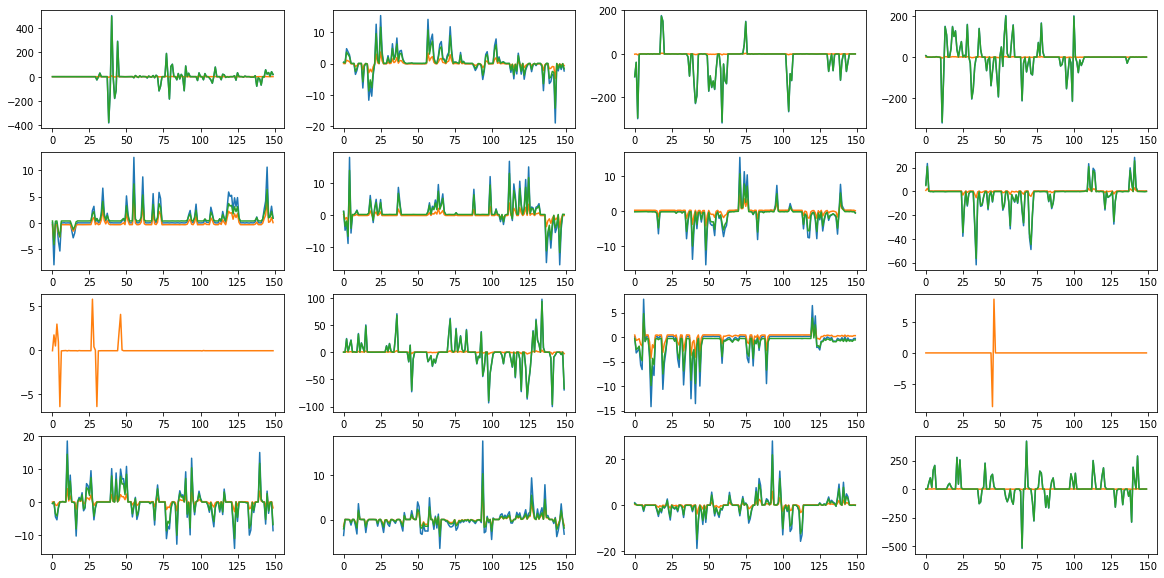

In [184]:
diff = test1-test2

rand = np.random.randint(0, len(diff), size=16)

fig, ax = plt.subplots(4, 4, figsize = (20, 10))
counter = 0
for idx in range(4):
  for jdx in range(4):
    ax[idx][jdx].plot(test1[rand[counter]])
    ax[idx][jdx].plot(test2[rand[counter]])
    ax[idx][jdx].plot(diff[rand[counter]])
    counter += 1

In [2]:
orderbook = pd.read_csv('./input_data/all/orderbook.csv')

In [21]:
orderbook['w_midprice_lag'] = np.log(orderbook['w_midprice']) - np.log(orderbook['w_midprice'].shift(100))

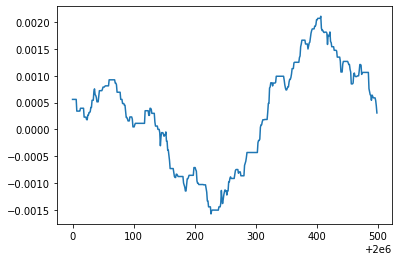

In [24]:
plt.plot(orderbook.w_midprice_lag[2_000_000:2_000_500])

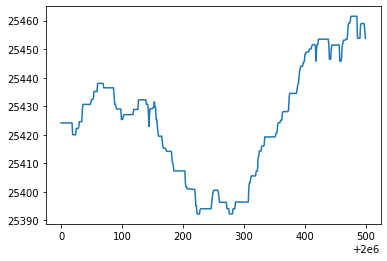

In [25]:
plt.plot(orderbook.w_midprice[2_000_000:2_000_500])